In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"Iris.csv")
# data
# 去掉不需要的ID列
data.drop("Id", axis=1, inplace=True)
# 删除重复的记录
data.drop_duplicates(inplace=True)
# Iris-setosa  Iris-versicolor  Iris-virginica
data["Species"] = data["Species"].map({"Iris-versicolor":0, "Iris-setosa": 1, "Iris-virginica": 2})
# 只选取类别为0与1的鸢尾花数据，进行逻辑回归的二分类。
data = data[data["Species"] != 2]
# len(data)

In [3]:
class LogisticRegression:
    """使用Python语言来实现逻辑回归算法。"""
    
    def __init__(self, alpha, times):
        """初始化方法。
        
        Parameters
        -----
        alpha : float
            学习率。
            
        times : int
            迭代次数。
        """
        
        self.alpha = alpha
        self.times = times
        
    def sigmoid(self, z):
        """sigmoid函数的实现
        
        Parameters
        -----
        z : float
            自变量，值为z = w.T * x
            
        Returns
        -----
        p : float, 值为[0, 1]之间。
            返回样本属于类别1的概率值，用来作为结果的预测。
            当s >= 0.5(z >= 0)时，判定为类别1， 否则判定为类别0。
        """
        return 1.0 / (1.0 + np.exp(-z))
    
    def fit(self, X, y):
        """根据提供的训练数据， 对模型进行训练。
        
        Parameters
        -----
        X : 类数组类型。形状为：[样本数量， 特征数量]
            待训练的样本特征属性。
            
        y : 类数组类型。形状为：[样本数量]
            每个样本的目标值。（标签）
        """
        
        X = np.asarray(X)
        y = np.asarray(y)
        # 创建权重的向量，初始值为0，长度比特征数多1。（多出来的一个是截距）
        self.w_ = np.zeros(1 + X.shape[1])
        # 创建损失列表，用来保存每次迭代后的损失值。
        self.loss_ = []
        
        for i in range(self.times):
            z = np.dot(X, self.w_[1:]) + self.w_[0]
            # 计算概率值(结果判定为1的概率值)
            p = self.sigmoid(z)
            # 根据逻辑回归的代价函数（目标函数），计算损失值。
            # 逻辑回归的代价函数（目标函数）:
            # J(w) = -sum(yi * log(s(zi)) + (1 - yi) * log(1 - s(zi))) [i从1到n，n为样本的数量]
            cost = -np.sum(y * np.log(p)+ (1 - y) * np.log(1 - p))
            self.loss_.append(cost)
            
            # 调整权重值， 根据公式：调整为：  权重（j列） = 权重（j列） + 学习率 * sum（ (y - s(z)) * x(j)）
            self.w_[0] += self.alpha * np.sum(y - p)
            self.w_[1:] += self.alpha * np.dot(X.T, y - p)
            
    def predict_proba(self, X):
        """根据参数传递的样本，对样本数据进行预测。
        
        Parameters
        -----
        X : 类数组类型。 形状为[样本数量， 特征数量]
            待测试的样本特征（属性）
            
        Returns
        -----
        result : 数组类型
            预测的结果（概率值）
        """
        
        X = np.asarray(X)
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        p = self.sigmoid(z)
        # 将预测结果变成二维数组（结构）。便于后续的拼接。
        p = p.reshape(-1, 1)
        # 将两个数组进行拼接。方向为横向拼接。
        return np.concatenate([1 - p, p], axis=1)
    
    def predict(self, X):
        """根据参数传递的样本，对样本数据进行预测。
        
        Parameters
        -----
        X : 类数组类型。 [样本数量， 特征数量]
            待测试的样本特征（属性）
            
        Returns
        -----
        result : 数组类型。
            预测的结果（分类值）
        
        """
        return np.argmax(self.predict_proba(X), axis=1)

In [7]:
t1 = data[data["Species"] == 0]
t2 = data[data["Species"] == 1]
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)

train_X = pd.concat([t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([t1.iloc[:40, -1], t2.iloc[:40, -1]], axis=0)
test_X = pd.concat([t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t1.iloc[40:, -1], t2.iloc[40:, -1]], axis=0)

# 鸢尾花的特征列都在同一个数量级，我们这里可以不用进行标准化处理。
lr = LogisticRegression(alpha=0.01, times=20)
lr.fit(train_X, train_y)
# 预测概率值
# lr.predict_proba(test_X)
result = lr.predict(test_X)
# 计算准确性
# np.sum(result == test_y)
np.sum((result == test_y) / len(test_y))

1.0

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

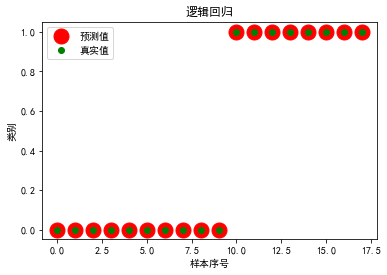

In [9]:
# 绘制预测值
plt.plot(result, "ro", ms=15, label="预测值")
# 绘制真实值
plt.plot(test_y.values, "go", label="真实值")
plt.title("逻辑回归")
plt.xlabel("样本序号")
plt.ylabel("类别")
plt.legend()
plt.show()

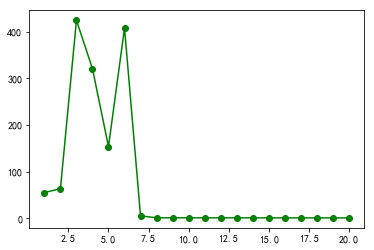

In [10]:
# 绘制目标函数的损失值
plt.plot(range(1, lr.times + 1), lr.loss_, "go-")